diabetes.csv

Logistic Regression:
 AUC: 0.80, Accuracy: 0.74, F1 Score: 0.62, Recall: 0.62
 Confusion Matrix:
 [[120  31]
 [ 30  50]]

Decision Tree:
 AUC: 0.67, Accuracy: 0.69, F1 Score: 0.58, Recall: 0.62
 Confusion Matrix:
 [[109  42]
 [ 30  50]]

Random Forest:
 AUC: 0.80, Accuracy: 0.75, F1 Score: 0.64, Recall: 0.64
 Confusion Matrix:
 [[123  28]
 [ 29  51]]


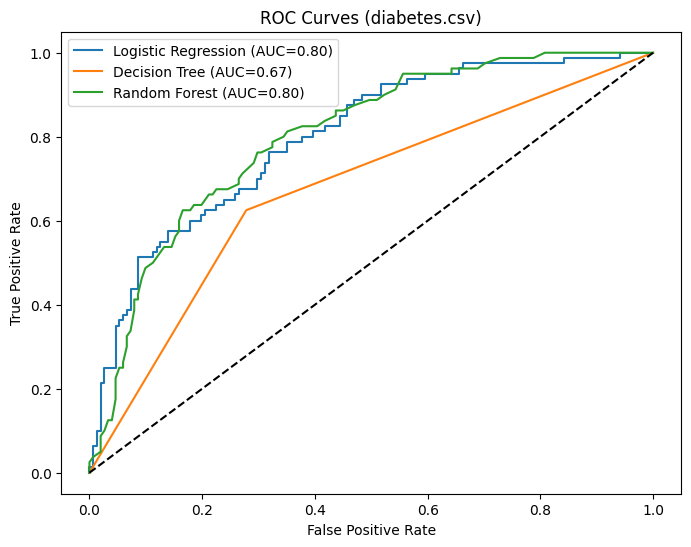

framingham.csv

Logistic Regression:
 AUC: 0.71, Accuracy: 0.85, F1 Score: 0.17, Recall: 0.10
 Confusion Matrix:
 [[912  11]
 [157  17]]

Decision Tree:
 AUC: 0.54, Accuracy: 0.76, F1 Score: 0.21, Recall: 0.20
 Confusion Matrix:
 [[803 120]
 [139  35]]

Random Forest:
 AUC: 0.67, Accuracy: 0.85, F1 Score: 0.11, Recall: 0.06
 Confusion Matrix:
 [[917   6]
 [164  10]]


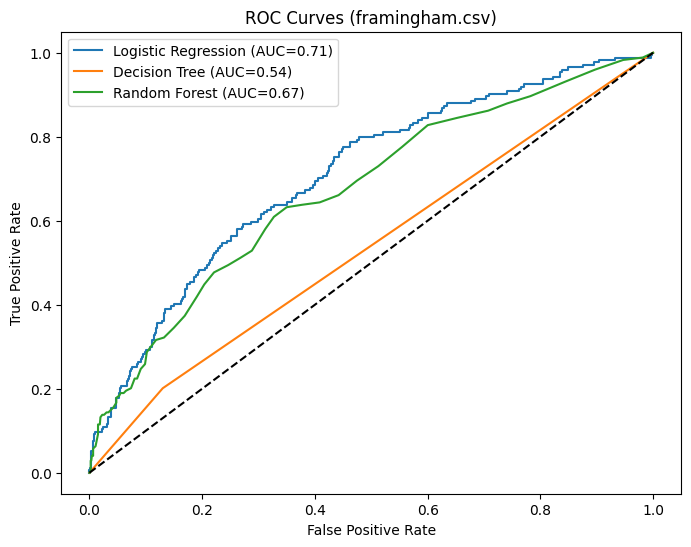

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

def preprocess(file_path, target_col):
    df = pd.read_csv(file_path, delimiter=",")
    df = df.dropna()
    X = df.drop(columns=[target_col])
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def train_models(X_train, y_train):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
    return models

def evaluate_models(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        cm = confusion_matrix(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        print(f"\n{name}:\n AUC: {auc:.2f}, Accuracy: {acc:.2f}, F1 Score: {f1:.2f}, Recall: {recall:.2f}\n Confusion Matrix:\n {cm}")
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(f"ROC Curves ({file_path})")
    plt.savefig(f"1_{file_path[:-3]}") # Remove the .csv extension
    plt.show()

def run_pipeline(file_path, target_col):
    X, y = preprocess(file_path, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    models = train_models(X_train, y_train)
    evaluate_models(models, X_test, y_test)

file_path = "diabetes.csv"
print(f"{file_path}")
run_pipeline(file_path, "Outcome")

file_path = "framingham.csv"
print(f"{file_path}")
run_pipeline(file_path, "TenYearCHD")

# U datasetu diabetes.csv se zdá, že Random Forest vykazuje nejlepší celkový výkon.
# Má nejvyšší Accuraccy (0.76) a F1 Score (0.65).
# Zároveň vykazuje vyvážený poměr mezi chybami (nižší počet FP a FN) oproti ostatním modelům.

# U datasetu framingham.csv se zdá, že Logistic Regression vykazuje nejvyšší Accuracy (0.85) a AUC (0.71), ale
# její F1 Score (0.17) a Recall (0.10) jsou velmi nízké. To naznačuje, že model prakticky přehlíží pozitivní případy (mnoho TN a FN).
# Naopak Decision Tree dosahuje mírně lepších hodnot F1 Score (0.22) a Recall (0.21).
# To naznačuje, že zachytí více pozitivních případů, i když celková přesnost a AUC jsou nižší.
# U tohoto datasetu žádný model nedosahuje uspokojivého výkonu.
# Muselo by dojít k ladění hyperparametrů, které jsem zde neřešil.

# AUC (Area Under the Curve) = udává, jak dobře model rozlišuje mezi třídami
# Accuracy = procentuální podíl správně klasifikovaných případů ze všech případů
# F1 Score = harmonický průměr přesnosti a citlivosti
# Recall = procentuální podíl detekovaných skutečných pozitivních případů

# Confusion Matrix
# [[TN FP]
# [ FN TP]]

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def preprocess(file_path, target_col):
    df = pd.read_csv(file_path, delimiter=";")
    df = df.dropna()
    X = df.drop(columns=[target_col])
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def train_models(X_train, y_train):
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
    return models

def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

def run_pipeline(file_path, target_col):
    X, y = preprocess(file_path, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    models = train_models(X_train, y_train)
    evaluate_models(models, X_test, y_test)

file_path = "winequality-red.csv"
print(f"{file_path}\n")
run_pipeline(file_path, "quality")

# Random Forest je lepší model než Decision Tree, protože má nižší MSE (0.42 vs. 0.61) a RMSE (0.65 vs. 0.78).
# Zároveň má podstatně vyšší R² (0.33 vs. 0.03), což znamená, že dokáže mnohem lépe vysvětlit variabilitu dat.

winequality-red.csv

Decision Tree: MSE: 0.64, RMSE: 0.80, R²: -0.01
Random Forest: MSE: 0.40, RMSE: 0.63, R²: 0.37
